In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import division, print_function
#%matplotlib inline

import os
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=4, suppress=True)
%cd -q ../test/

## Running simulations on using the Prior on first-order distribution of orientations

In [2]:
%%writefile experiment_firstorder.py
# -*- coding: utf8 -*-
from __future__ import division, print_function
"""

$ python experiment_fig-firstorder.py

"""
import numpy as np
from SparseEdges import SparseEdges
seed, N_image, N = 21341353, 100, 1024
name_database = 'serre07_distractors'

mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.datapath = 'database/'
mp.pe.seed = seed # this ensures that all image lists are the same for the different experiments
mp.pe.N_image = N_image
mp.pe.N = N

# control experiment
print ('Range of spatial frequencies: ', mp.sf_0)
print ('Range of angles: ', mp.theta*180./np.pi)
imageslist, edgeslist, RMSE = mp.process(exp='prior_vanilla', name_database=name_database)

try:
    #imageslist_noise, edgeslist_noise, RMSE_noise = mp.process(exp='prior_vanilla_noise_' + str(mp.pe.noise).replace('.', '_'), name_database=name_database, noise=mp.pe.noise)

    #mp.MP_rho = .994304364466
    #imageslist, edgeslist, RMSE = mp.process(exp='prior_quant', name_database=name_database)
    #mp.MP_rho = None

    # first-order prior
    
    # TODO: make B_theta vary
    
    v_hist, v_theta_edges = mp.histedges_theta(edgeslist, display=False)
    v_theta_middles, v_theta_bin  = (v_theta_edges[1:]+v_theta_edges[:-1])/2, v_theta_edges[1]-v_theta_edges[0]
    v_hist, v_theta_edges = mp.histedges_theta(edgeslist, display=False)
    v_theta_middles, v_theta_bin  = (v_theta_edges[1:]+v_theta_edges[:-1])/2, v_theta_edges[1]-v_theta_edges[0]

    z = np.linspace(0, 1., mp.pe.n_theta+1)
    P = np.cumsum(np.hstack((0, v_hist[-1]/2, v_hist[:-1], v_hist[-1]/2)))
    theta_prior = np.interp(z, P, np.hstack((v_theta_edges[0]-v_theta_bin/2, v_theta_edges[:-1], v_theta_edges[-1]-v_theta_bin/2)))
    print('Min', theta_prior.min()*180/np.pi, ', Max=', theta_prior.max()*180/np.pi)

    mp_prior = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
    mp_prior.pe.datapath = 'database/'
    mp_prior.pe.seed = seed # this ensures that all image lists are the same for the different experiments
    mp_prior.pe.N_image = N_image
    mp_prior.pe.N = N
    mp_prior.theta = theta_prior[1:]
    print('orientations used in the coding process=', mp_prior.theta*180./np.pi)

    imageslist, edgeslist, RMSE =  mp_prior.process(exp='prior_firstorder', name_database=name_database)
    #mp.MP_rho = .994304364466
    #imageslist, edgeslist, RMSE = mp.process(exp='prior_quant_firstorder', name_database=name_database)
    #mp.MP_rho = None
    #imageslist_noise, edgeslist_noise, RMSE_noise = mp.process(exp='prior_firstorder_noise_' + str(mp.pe.noise).replace('.', '_'), name_database=name_database, noise=mp.pe.noise)
    #except:
    #    print('run again once first batches are finished ')



except TypeError:
    print('Extraction not finished')


Overwriting experiment_firstorder.py


In [3]:
%run experiment_firstorder.py

Range of spatial frequencies:  [ 0.618   0.382   0.2361  0.1459  0.0902  0.0557  0.0344  0.0213  0.0132
  0.0081  0.005 ]
Range of angles:  [-82.5 -75.  -67.5 -60.  -52.5 -45.  -37.5 -30.  -22.5 -15.   -7.5   0.
   7.5  15.   22.5  30.   37.5  45.   52.5  60.   67.5  75.   82.5  90. ]
Min -90.0 , Max= 90.0
orientations used in the coding process= [-87.5185 -82.8214 -74.3682 -63.647  -53.0499 -42.6165 -32.4516 -22.9408
 -14.4127  -7.9829  -3.1588  -0.4187   2.3215   6.5265  12.7986  21.3737
  30.9623  41.1997  52.2177  63.0158  73.6001  82.5896  87.5185  90.    ]


## Analysing results on using the Prior on first-order distribution of orientations

First, we retrieve edges from a prior edge extraction

In [4]:
import numpy as np
from SparseEdges import SparseEdges
seed, N_image, N = 21341353, 100, 1024
name_database = 'serre07_distractors'

mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.datapath = 'database/'
mp.pe.seed = seed # this ensures that all image lists are the same for the different experiments
mp.pe.N_image = N_image
mp.pe.N = N

imageslist, edgeslist, RMSE = mp.process(exp='prior_vanilla', name_database=name_database)

In [5]:
fig_width_pt = 318.670  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches
mp.pe.figpath = '../test/results'
mp.pe.figpath = '../figures'

In [6]:
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
ax = fig.add_subplot(111, axisbg='w', polar=True)
fig, ax = mp.histedges_theta(edgeslist, fig=fig, ax=ax)
v_hist, v_theta_edges = mp.histedges_theta(edgeslist, display=False)
ax.plot(v_theta_edges, np.ones_like(v_theta_edges)*np.sqrt(v_hist.mean()), 'r--')
ax.plot(v_theta_edges+np.pi, np.ones_like(v_theta_edges)*np.sqrt(v_hist.mean()), 'r--')

mp.savefig(fig, 'firstorder_A');

In [7]:
!ls ../figures/firstorder_A*

../figures/firstorder_A.jpg ../figures/firstorder_A.png
../figures/firstorder_A.pdf ../figures/firstorder_A.svg


In [8]:
v_hist, v_theta_edges = mp.histedges_theta(edgeslist, display=False)
v_theta_middles, v_theta_bin  = (v_theta_edges[1:]+v_theta_edges[:-1])/2, v_theta_edges[1]-v_theta_edges[0]

In [9]:
print ('angles for the edges of bins (deg) = ', mp.theta*180/np.pi)
print ('angles for the edges of bins (deg) = ', mp.binedges_theta*180/np.pi)
print ('angles for the edges of bins (deg) = ', v_theta_edges*180/np.pi)
print ('angles for the middle of bins (deg) = ', v_theta_middles*180/np.pi)
print ('angles for the center of bins (deg) = ', (v_theta_edges-v_theta_bin/2)*180/np.pi)

angles for the edges of bins (deg) =  [-82.5 -75.  -67.5 -60.  -52.5 -45.  -37.5 -30.  -22.5 -15.   -7.5   0.
   7.5  15.   22.5  30.   37.5  45.   52.5  60.   67.5  75.   82.5  90. ]
angles for the edges of bins (deg) =  [-86.25 -78.75 -71.25 -63.75 -56.25 -48.75 -41.25 -33.75 -26.25 -18.75
 -11.25  -3.75   3.75  11.25  18.75  26.25  33.75  41.25  48.75  56.25
  63.75  71.25  78.75  86.25  93.75]
angles for the edges of bins (deg) =  [-86.25 -78.75 -71.25 -63.75 -56.25 -48.75 -41.25 -33.75 -26.25 -18.75
 -11.25  -3.75   3.75  11.25  18.75  26.25  33.75  41.25  48.75  56.25
  63.75  71.25  78.75  86.25  93.75]
angles for the middle of bins (deg) =  [-82.5 -75.  -67.5 -60.  -52.5 -45.  -37.5 -30.  -22.5 -15.   -7.5  -0.
   7.5  15.   22.5  30.   37.5  45.   52.5  60.   67.5  75.   82.5  90. ]
angles for the center of bins (deg) =  [-90.  -82.5 -75.  -67.5 -60.  -52.5 -45.  -37.5 -30.  -22.5 -15.   -7.5
  -0.    7.5  15.   22.5  30.   37.5  45.   52.5  60.   67.5  75.   82.5
  90. ]


Now, we may use this statistics:


In [10]:
z = np.linspace(0, 1., mp.pe.n_theta+1)
P = np.cumsum(np.hstack((0, v_hist[-1]/2, v_hist[:-1], v_hist[-1]/2)))
theta_prior = np.interp(z, P, np.hstack((v_theta_edges[0]-v_theta_bin/2, v_theta_edges[:-1], v_theta_edges[-1]-v_theta_bin/2))) #% np.pi

In [11]:
z = z[1:]
P = P[1:]
print ('z = ', z)
print ('P = ', P)
print ('uniform angles (deg) = ', mp.theta*180/np.pi)
print ('prior  angles (deg) = ', theta_prior*180/np.pi)
print ('prior  angles (deg) = ', mp_prior.theta*180/np.pi)

z =  [ 0.0417  0.0833  0.125   0.1667  0.2083  0.25    0.2917  0.3333  0.375
  0.4167  0.4583  0.5     0.5417  0.5833  0.625   0.6667  0.7083  0.75
  0.7917  0.8333  0.875   0.9167  0.9583  1.    ]
P =  [ 0.063   0.1075  0.1374  0.1663  0.1953  0.2259  0.2554  0.2861  0.3182
  0.3524  0.3914  0.4493  0.5634  0.6173  0.6547  0.6888  0.7199  0.7502
  0.7782  0.8073  0.8362  0.8657  0.8953  0.937   1.    ]
uniform angles (deg) =  [-82.5 -75.  -67.5 -60.  -52.5 -45.  -37.5 -30.  -22.5 -15.   -7.5   0.
   7.5  15.   22.5  30.   37.5  45.   52.5  60.   67.5  75.   82.5  90. ]
prior  angles (deg) =  [-90.     -87.5185 -82.8214 -74.3682 -63.647  -53.0499 -42.6165 -32.4516
 -22.9408 -14.4127  -7.9829  -3.1588  -0.4187   2.3215   6.5265  12.7986
  21.3737  30.9623  41.1997  52.2177  63.0158  73.6001  82.5896  87.5185
  90.    ]
prior  angles (deg) =  [-87.5185 -82.8214 -74.3682 -63.647  -53.0499 -42.6165 -32.4516 -22.9408
 -14.4127  -7.9829  -3.1588  -0.4187   2.3215   6.5265  12.7986  21.3737
 

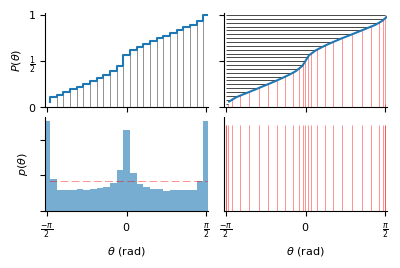

In [12]:
mp.init_binedges()

fig, [[B, C], [A, D]] = plt.subplots(2, 2, figsize=(fig_width, fig_width/1.618), subplot_kw={'axisbg':'w'}, sharex=True)
for ax in [A, B, C, D]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

fig.subplots_adjust(wspace=0.1, hspace=0.1,
                    left=0.125, right=0.9,
                    top=0.9,    bottom=0.175)
A.bar(v_theta_edges-v_theta_bin, np.hstack((v_hist[-1], v_hist)), alpha=.6, width=v_theta_bin, align='edge')
A.hlines([v_hist.mean()], [v_theta_edges[0]-v_theta_bin/8.], [v_theta_edges[-1]+v_theta_bin/8.], 
         lw=.5, color='r', linestyle='--',
         alpha=.6)
plt.setp(A, yticklabels=[], ylabel=r'$p(\theta)$',#xlim=[v_theta_edges[0]-v_theta_bin/4, v_theta_edges[-1]+v_theta_bin/4], 
         #xticks=[-np.pi/2, 0, np.pi/2], xticklabels=[r'$\frac{-\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$'], 
         xticks=[0, np.pi/2], xticklabels=[r'$0$', r'$\frac{\pi}{2}$'], 
         xlabel=r'$\theta$ (rad)')
B.step(v_theta_edges, P, where='pre')
B.vlines(((mp.theta[:-1] + np.pi/2 + v_theta_bin/4)  % np.pi ) - np.pi/2  + v_theta_bin/4, [0], P[1:], lw=.5, color='k', alpha=.6)
plt.setp(B, xticks=[], ylim=[0, 1.02], yticks=[0., 0.5, 1.], yticklabels=['0', r'$\frac{1}{2}$', '1'], ylabel=r'$P(\theta)$')#, xlim=[v_theta_edges[0], v_theta_edges[-1]]
#B.text(-np.pi/2*1.65, 1.05, '(B)')
C.plot(v_theta_edges, P)
C.hlines(z[:-1], [v_theta_edges[0]-v_theta_bin/2], theta_prior[1:], lw=.5)
C.hlines([1], [v_theta_edges[0]-v_theta_bin/2], theta_prior[-1], lw=.5)
C.vlines(theta_prior[1:], [0], z[:-1], lw=.5, color='r', alpha=.6)
C.vlines(theta_prior[-1], [0], [1], lw=.5, color='r', alpha=.6)
#C.text(-np.pi/2*1.1, 1.05, '(C)')
bord = 0.03
plt.setp(C, ylim=[0,1.02], xticks=[-np.pi/2, 0, np.pi/2], xticklabels=['', '', ''], yticks=[0., 0.5, 1.], yticklabels=['', '', ''],
         xlim=[v_theta_edges[0]-v_theta_bin/2-bord, v_theta_edges[-1]-v_theta_bin/2+bord])#
#D.axis('tight')
#D.vlines((theta_prior + np.pi/2) % np.pi  - np.pi/2, [0], np.ones_like(z), lw=.5, color='r')
D.vlines(theta_prior, [0], np.ones_like(z), lw=.5, color='r', alpha=.6)
D.vlines([-np.pi/2, np.pi/2], [0], np.ones_like(z), lw=.5, color='r', alpha=.6)
#D.vlines(((mp.theta[:-1] + np.pi/2 + v_theta_bin/2)  % np.pi ) - np.pi/2  - v_theta_bin/2, [0], np.ones_like(z), lw=.5, color='k', alpha=.6)
#D.plot(theta, np.ones_like(z), ms='^', lw=0, color='r')
plt.setp(D, ylim=[0, 1.1], yticks=[], xlim=[v_theta_edges[0]-v_theta_bin/2-bord, v_theta_edges[-1]-v_theta_bin/2+bord], 
         xticks=[-np.pi/2, 0, np.pi/2], xticklabels=[r'$\frac{-\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$'], 
         #xticks=[0, np.pi/2], xticklabels=[r'$0$', r'$\frac{\pi}{2}$'], 
         xlabel=r'$\theta$ (rad)')
#D.text(-np.pi/2*1.1, 1.35, '(D)')
mp.savefig(fig, 'laughlin')
fig

### analyzing efficiency

In [13]:
experiments = ['prior_vanilla', 'prior_firstorder']
databases = [name_database] * len(experiments)
labels = ['control', 'with prior']
mps = [mp, mp_prior]
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
fig, a, ax = mp.plot(mps=mps, experiments=experiments, databases=databases, fig=fig, labels=labels, 
                  color=[0., 0., 1.], threshold=0.3, ref=0, scale=True)
mp.savefig(fig, 'firstorder_C')

In [14]:
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
fig, a, ax = mp.plot(mps=mps, experiments=experiments, databases=databases, fig=fig, labels=labels, 
                  color=[0., 0., 1.], threshold=0.55, ref=0, scale=True)
mp.savefig(fig, 'firstorder_C')

In [15]:
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
fig, a, ax = mp.plot(mps=mps, experiments=experiments, databases=databases, fig=fig, labels=labels, 
                  color=[0., 0., 1.], threshold=0.8, ref=0, scale=True)
mp.savefig(fig, 'firstorder_C')

In [16]:
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
fig, a, ax = mp.plot(mps=mps, experiments=experiments, databases=databases, fig=fig, labels=labels, 
                  color=[0., 0., 1.], threshold=0.3, ref=0, scale=True)
mp.savefig(fig, 'firstorder_C')

### verifying the histogram of output orientations

In [17]:
imageslist, edgeslist, RMSE = mp_prior.process(exp='prior_firstorder', name_database=name_database)

In [18]:
mp_prior.init_binedges()

print ('prior angles (deg) = ', mp_prior.theta*180/np.pi)

print ('bin angles (deg) = ',  mp_prior.binedges_theta*180/np.pi)

theta = edgeslist[2, ...].ravel()
value = edgeslist[4, ...].ravel()

print('Min', theta.min()*180/np.pi, ', Max=', theta.max()*180/np.pi)
print ('selected angles (deg) = ',  np.unique(theta)*180/np.pi)
print ('diff angles (deg) = ', (np.unique(theta) - mp_prior.theta) *180/np.pi)

weights = np.absolute(value)/(np.absolute(value)).sum()
v_hist, v_theta_edges_ = np.histogram(theta, bins=mp_prior.binedges_theta, density=False, weights=weights)
print ('bin angles (deg) = ',  v_theta_edges_*180/np.pi)
print ('Histogram =', v_hist/v_hist.mean())

prior angles (deg) =  [-87.5185 -82.8214 -74.3682 -63.647  -53.0499 -42.6165 -32.4516 -22.9408
 -14.4127  -7.9829  -3.1588  -0.4187   2.3215   6.5265  12.7986  21.3737
  30.9623  41.1997  52.2177  63.0158  73.6001  82.5896  87.5185  90.    ]
bin angles (deg) =  [-88.7593 -85.1699 -78.5948 -69.0076 -58.3484 -47.8332 -37.534  -27.6962
 -18.6768 -11.1978  -5.5709  -1.7887   0.9514   4.424    9.6625  17.0862
  26.168   36.081   46.7087  57.6168  68.3079  78.0948  85.054   88.7593
  91.2407]
Min -87.5185076462 , Max= 90.0
selected angles (deg) =  [-87.5185 -82.8214 -74.3682 -63.647  -53.0499 -42.6165 -32.4516 -22.9408
 -14.4127  -7.9829  -3.1588  -0.4187   2.3215   6.5265  12.7986  21.3737
  30.9623  41.1997  52.2177  63.0158  73.6001  82.5896  87.5185  90.    ]
diff angles (deg) =  [ 0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]
bin angles (deg) =  [-88.7593 -85.1699 -78.5948 -69.0076 -58.3484 -47.8332 -37.534  -27.6962
 -18.6768 -11.1978 

In [19]:
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
ax = fig.add_subplot(111, axisbg='w', polar=True)
fig, ax = mp_prior.histedges_theta(edgeslist, fig=fig, ax=ax)
v_hist, v_theta_edges = mp_prior.histedges_theta(edgeslist, display=False)
mp_prior.savefig(fig, 'firstorder_B')

In [20]:
theta_bin = (mp_prior.theta + np.hstack((mp_prior.theta[-1]-np.pi, mp_prior.theta[:-1]))) /2
#self.theta[:-1] + self.theta[1:]) / 2. # middles
binedges_theta = np.hstack((theta_bin, theta_bin[0]+np.pi))
width = binedges_theta[1:] - binedges_theta[:-1]
print(width / (np.pi/mp_prior.pe.n_theta))

[ 0.4786  0.8767  1.2783  1.4212  1.402   1.3732  1.3117  1.2026  0.9972
  0.7503  0.5043  0.3653  0.463   0.6985  0.9898  1.2109  1.3217  1.417
  1.4544  1.4255  1.3049  0.9279  0.494   0.3309]


In [21]:
%cd -q ../notebooks

## some book keeping for the notebook

In [22]:
import watermark
%watermark

In [23]:
import version_information
%version_information numpy, scipy, matplotlib, sympy